## Requirements

* python-igraph
* set directory in the next cell

In [1]:
datadir = '../Datasets/'

In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
pd.set_option("display.precision", 10)

In [3]:
## define colors and node sizes here
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']
sz = [6,9,12]

In [4]:
## To produce LaTeX from a DataFrame
#df = df.round(decimals=3)
#print(df.to_latex(index=False))
#print(df.to_latex(index=True))

In [5]:
## read edges and build weighted directed graph
D = pd.read_csv(datadir+'MRP/Cit_Phy.csv', names = ['from', 'to'], header=1)
g = ig.Graph.TupleList([tuple(x) for x in D.values], directed=True)
print(g.vcount(),'nodes and',g.ecount(),'directed edges')
D.head()

27770 nodes and 352806 directed edges


,from,to
0,1001,9308122
1,1001,9309097
2,1001,9311042
3,1001,9401139
4,1001,9404151


In [6]:
## directed degree centrality
def degree_centrality(g, weights=None):
    n = g.vcount()
    if g.is_directed():
        dc = [sum(x)/(2*(n-1)) for x in zip(g.strength(mode='in',weights=weights),\
              g.strength(mode='out',weights=weights))]
    else:
        dc = [x/(n-1) for x in g.strength(weights=weights)]
    return dc

In [7]:
dic_deg = []

for i,v in enumerate(g.vs):  
    deg = {}
    #print(v['name'])
    deg['node'] = v['name']
    deg['total_degree'] = g.degree(i)
    deg['in_degree'] = g.indegree(i)
    deg['out_degree'] = g.outdegree(i)
    dic_deg.append(deg)
len(dic_deg)

27770

## Warning for disconnected graphs

In the code below, we get a warning when running closeness centrality, since the graph is not connected.
Here are the details from the help file:

''If the graph is not connected, and there is no path between two
vertices, the number of vertices is used instead the length of
the geodesic. This is always longer than the longest possible
geodesic.''

In [8]:
deg_df = pd.DataFrame(dic_deg)
deg_df['degree'] = degree_centrality(g)
deg_df['pagerank'] = g.pagerank()
deg_df['authority'] = g.authority_score()
deg_df['hub'] = g.hub_score()
deg_df['between'] = g.betweenness()
deg_df['eigen'] = g.eigenvector_centrality(directed=True)

# Normalizing betweenness
n = g.vcount()
deg_df['between'] = [2*x/((n-1)*(n-2)) for x in deg_df['between']]

deg_df['closeness'] = g.closeness()
deg_df.head(10)

C:\Users\naahi\anaconda4\envs\graphmining\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph-jst2e\vendor\build\igraph\igraph-0.9.0-pre+0afacadd-msvc\src\centrality.c:2856
  del sys.path[0]


,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness
0,1001,92,10,82,0.0016565235,0.0000134568,0.0046857406,0.1380391258,0.0001139029,0.0000000037,0.0026789139
1,9308122,122,115,7,0.0021966942,0.0002522683,0.0177584670,0.0030706070,0.0000159248,0.0748149077,0.0026767959
2,9309097,144,140,4,0.0025928193,0.0010687771,0.0189014571,0.0027011303,0.0000302233,0.1103955311,0.0026781750
3,9311042,57,55,2,0.0010263243,0.0001445211,0.0090820589,0.0024596209,0.0000009571,0.0239495382,0.0026768046
4,9401139,461,421,40,0.0083006230,0.0021959155,0.0788984276,0.0119725606,0.0016183099,0.4892431017,0.0026810112
5,9404151,79,77,2,0.0014224495,0.0004617606,0.0178898968,0.0018152300,0.0000320686,0.2320344110,0.0026775000
6,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012
7,9408099,1013,1006,7,0.0182397638,0.0031245039,0.1465788384,0.0164578110,0.0001030103,0.3233686415,0.0026816393
8,9501030,153,126,27,0.0027548705,0.0011193615,0.0323078189,0.0561241983,0.0003708565,0.4362647473,0.0026793913
9,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957


In [9]:
df_cur = pd.read_csv(datadir+'MRP\MRP_current.csv')
df_cur.head()

,node,groundtruth
0,9711200,20753
1,9802150,12839
2,9802109,10739
3,9905111,5772
4,9407087,4515


In [10]:
# Sorting based on total degree
deg_total = deg_df.sort_values(by="in_degree",ascending=False)
df2 = pd.merge(deg_total,df_cur, on = 'node')
df2.head(10)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
1,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839
2,9802109,1653,1641,12,0.0297634052,0.0020447554,0.7980816696,0.1168329469,0.0031425797,0.0189674479,0.0026822299,10739
3,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
4,9610043,1218,1199,19,0.0219309302,0.0026650617,0.2700928738,0.0977787907,0.0010519599,0.0753718943,0.0026825118,3297
5,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602
6,9908142,1219,1144,75,0.0219489359,0.0013965573,0.1381528246,0.1189866627,0.0185813727,0.0000341330,0.0026814852,5623
7,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
8,9906064,1038,1032,6,0.0186899060,0.0017411139,0.1638208520,0.0800306117,0.0240350307,0.0008945986,0.0026803345,8931
9,9408099,1013,1006,7,0.0182397638,0.0031245039,0.1465788384,0.0164578110,0.0001030103,0.3233686415,0.0026816393,2940


In [46]:
def highlight_columns(df, rows=10, color='lightblue', columns_to_shadow=['degree']):
    highlight = lambda slice_of_df: 'background-color: %s' % color
    sample_df = df.head(rows)
    #if len(columns_to_show) != 0:
       # sample_df = sample_df[columns_to_show]
    highlighted_df = sample_df.style.applymap(highlight, subset=pd.IndexSlice[:, columns_to_shadow])
    return highlighted_df

In [47]:
#Sorting based on degree centrality measure
deg_degree = deg_df.sort_values(by="degree",ascending=False)
#df3 = pd.merge(deg_degree,df_cur,left_on=['node'], right_on = ['node'], how = 'left')
df3 = pd.merge(deg_degree,df_cur, on = 'node')
highlight_columns(df3)
#df3.head(10)

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
1,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839
2,9802109,1653,1641,12,0.0297634052,0.0020447554,0.7980816696,0.1168329469,0.0031425797,0.0189674479,0.0026822299,10739
3,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
4,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
5,9908142,1219,1144,75,0.0219489359,0.0013965573,0.1381528246,0.1189866627,0.0185813727,0.0000341330,0.0026814852,5623
6,9610043,1218,1199,19,0.0219309302,0.0026650617,0.2700928738,0.0977787907,0.0010519599,0.0753718943,0.0026825118,3297
7,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602
8,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
9,9906064,1038,1032,6,0.0186899060,0.0017411139,0.1638208520,0.0800306117,0.0240350307,0.0008945986,0.0026803345,8931


In [48]:
# Sorting based on pagerank centrality measure
deg_pagerank = deg_df.sort_values(by="pagerank",ascending=False)
df4 = pd.merge(deg_pagerank,df_cur, on = 'node')
highlight_columns(df4, columns_to_shadow=['pagerank'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9207016,220,219,1,0.0039612518,0.0062291370,0.0347370762,0.0000090809,0.0000139075,0.6684739773,0.0026790824,8914
1,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
2,9201015,15,14,1,0.0002700853,0.0056382947,0.0001573483,0.0020047543,0.0000011733,0.1486901232,0.0026748167,21
3,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
4,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602
5,9402044,257,257,0,0.0046274623,0.0038207263,0.0254660180,0.0000000000,0.0000000000,0.1929227691,0.0026789447,942
6,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
7,9410167,773,748,25,0.0139183982,0.0032902186,0.1839691906,0.0299412367,0.0005964183,1.0000000000,0.0026815122,2124
8,9408099,1013,1006,7,0.0182397638,0.0031245039,0.1465788384,0.0164578110,0.0001030103,0.3233686415,0.0026816393,2940
9,9402002,296,282,14,0.0053296842,0.0028954974,0.0493524798,0.0100227554,0.0001172941,0.8471429331,0.0026803224,633


In [49]:
# Sorting based on authority centrality measure
deg_authority = deg_df.sort_values(by="authority",ascending=False)
df5 = pd.merge(deg_authority,df_cur, on = 'node')
highlight_columns(df5, columns_to_shadow=['authority'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
1,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839
2,9802109,1653,1641,12,0.0297634052,0.0020447554,0.7980816696,0.1168329469,0.0031425797,0.0189674479,0.0026822299,10739
3,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
4,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602
5,9610043,1218,1199,19,0.0219309302,0.0026650617,0.2700928738,0.0977787907,0.0010519599,0.0753718943,0.0026825118,3297
6,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
7,9803131,533,475,58,0.0095970327,0.0005287710,0.2215797393,0.3258412542,0.0075880917,0.0049750054,0.0026802078,3824
8,9510135,790,775,15,0.0142244949,0.0024897147,0.1993661437,0.0786937710,0.0005637794,0.3684421768,0.0026818351,1930
9,9410167,773,748,25,0.0139183982,0.0032902186,0.1839691906,0.0299412367,0.0005964183,1.0000000000,0.0026815122,2124


In [50]:
# Sorting based on hub centrality measure
deg_hub = deg_df.sort_values(by="hub",ascending=False)
df6 = pd.merge(deg_hub,df_cur, on = 'node')
highlight_columns(df6, columns_to_shadow=['hub'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
1,110055,307,5,302,0.0055277468,0.0000142207,0.0006931399,0.6153484973,0.0008550233,0.0000000000,0.0026817199,71
2,7170,341,78,263,0.0061399402,0.0000484162,0.0230171075,0.5587203152,0.0035474182,0.0000000331,0.0026815075,259
3,101126,334,60,274,0.0060139004,0.0000429486,0.0117409589,0.5344981444,0.0036078744,0.0000000100,0.0026809657,344
4,210157,293,4,289,0.0052756671,0.0000121274,0.0002580437,0.5257460471,0.0000990427,0.0000000000,0.0026809843,79
5,9811019,101,4,97,0.0018185747,0.0000165595,0.0005867735,0.5173996973,0.0009287003,0.0000000035,0.0026801669,17
6,9806199,247,88,159,0.0044474054,0.0001086719,0.0276811529,0.4937831138,0.0050417091,0.0000694671,0.0026809926,1440
7,9912164,161,27,134,0.0028989161,0.0000211846,0.0125734029,0.4924865191,0.0009740903,0.0000000909,0.0026802145,99
8,9710046,431,72,359,0.0077604523,0.0000574523,0.0264957786,0.4872513843,0.0035157600,0.0003793222,0.0026809571,168
9,9802051,294,87,207,0.0052936728,0.0000864038,0.0271323833,0.4668772939,0.0046387828,0.0000700285,0.0026809232,242


In [52]:
# Sorting based on eigen centrality measure
deg_eigen = deg_df.sort_values(by="eigen",ascending=False)
df7 = pd.merge(deg_eigen,df_cur, on = 'node')
highlight_columns(df7, columns_to_shadow=['eigen'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9410167,773,748,25,0.0139183982,0.0032902186,0.1839691906,0.0299412367,0.0005964183,1.0000000000,0.0026815122,2124
1,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
2,9207053,102,102,0,0.0018365804,0.0020448748,0.0171936026,0.0000000000,0.0000000000,0.8880242293,0.0026779064,213
3,9402002,296,282,14,0.0053296842,0.0028954974,0.0493524798,0.0100227554,0.0001172941,0.8471429331,0.0026803224,633
4,9305185,184,171,13,0.0033130469,0.0020193237,0.0299765290,0.0095896763,0.0000634713,0.8069622140,0.0026786648,290
5,9205027,191,191,0,0.0034390868,0.0025113148,0.0228181585,0.0000000000,0.0000000000,0.7223392284,0.0026780006,434
6,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
7,9211056,72,68,4,0.0012964097,0.0014625654,0.0095027097,0.0025375071,0.0000030534,0.6854991474,0.0026777633,135
8,9207016,220,219,1,0.0039612518,0.0062291370,0.0347370762,0.0000090809,0.0000139075,0.6684739773,0.0026790824,8914
9,9304154,238,229,9,0.0042853542,0.0023302366,0.0302892401,0.0057422080,0.0000322279,0.6608455118,0.0026789943,526


In [58]:
# Sorting based on closeness centrality measure
deg_closeness = deg_df.sort_values(by="closeness",ascending=False)
df7 = pd.merge(deg_closeness,df_cur, on = 'node')
highlight_columns(df7, columns_to_shadow=['closeness'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
1,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
2,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
3,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602
4,9610043,1218,1199,19,0.0219309302,0.0026650617,0.2700928738,0.0977787907,0.0010519599,0.0753718943,0.0026825118,3297
5,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839
6,9503124,1124,1114,10,0.0202383953,0.0044694717,0.2618423860,0.0256298191,0.0008354892,0.9832559316,0.0026823957,3197
7,9802109,1653,1641,12,0.0297634052,0.0020447554,0.7980816696,0.1168329469,0.0031425797,0.0189674479,0.0026822299,10739
8,9510135,790,775,15,0.0142244949,0.0024897147,0.1993661437,0.0786937710,0.0005637794,0.3684421768,0.0026818351,1930
9,110055,307,5,302,0.0055277468,0.0000142207,0.0006931399,0.6153484973,0.0008550233,0.0000000000,0.0026817199,71


In [59]:
# Sorting based on closeness centrality measure
deg_between = deg_df.sort_values(by="between",ascending=False)
df8 = pd.merge(deg_between,df_cur, on = 'node')
highlight_columns(df8, columns_to_shadow=['between'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
1,9906064,1038,1032,6,0.0186899060,0.0017411139,0.1638208520,0.0800306117,0.0240350307,0.0008945986,0.0026803345,8931
2,9908142,1219,1144,75,0.0219489359,0.0013965573,0.1381528246,0.1189866627,0.0185813727,0.0000341330,0.0026814852,5623
3,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
4,9803131,533,475,58,0.0095970327,0.0005287710,0.2215797393,0.3258412542,0.0075880917,0.0049750054,0.0026802078,3824
5,9806199,247,88,159,0.0044474054,0.0001086719,0.0276811529,0.4937831138,0.0050417091,0.0000694671,0.0026809926,1440
6,9802051,294,87,207,0.0052936728,0.0000864038,0.0271323833,0.4668772939,0.0046387828,0.0000700285,0.0026809232,242
7,101126,334,60,274,0.0060139004,0.0000429486,0.0117409589,0.5344981444,0.0036078744,0.0000000100,0.0026809657,344
8,7170,341,78,263,0.0061399402,0.0000484162,0.0230171075,0.5587203152,0.0035474182,0.0000000331,0.0026815075,259
9,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839


In [56]:
df_j = pd.concat([df3, df4, df5, df6, df7])
df_j = df_j.drop_duplicates()
df_j = df_j.sort_values(by='groundtruth', ascending = False)
highlight_columns(df_j, rows=32, columns_to_shadow=['groundtruth'])

,node,total_degree,in_degree,out_degree,degree,pagerank,authority,hub,between,eigen,closeness,groundtruth
0,9711200,2468,2414,54,0.0444380424,0.0033676229,1.0000000000,0.1480491176,0.0138836232,0.0259129405,0.0026833729,20753
1,9802150,1797,1775,22,0.0323562246,0.0022291679,0.8365828056,0.1259551345,0.0035449952,0.0184553976,0.0026824854,12839
2,9802109,1653,1641,12,0.0297634052,0.0020447554,0.7980816696,0.1168329469,0.0031425797,0.0189674479,0.0026822299,10739
9,9906064,1038,1032,6,0.0186899060,0.0017411139,0.1638208520,0.0800306117,0.0240350307,0.0008945986,0.0026803345,8931
24,9207016,220,219,1,0.0039612518,0.0062291370,0.0347370762,0.0000090809,0.0000139075,0.6684739773,0.0026790824,8914
3,9905111,1369,807,562,0.0246497893,0.0008944375,0.3093038228,1.0000000000,0.2144736867,0.0005184932,0.0026829143,5772
5,9908142,1219,1144,75,0.0219489359,0.0013965573,0.1381528246,0.1189866627,0.0185813727,0.0000341330,0.0026814852,5623
4,9407087,1308,1299,9,0.0235514423,0.0060843640,0.1805611930,0.0112417901,0.0006697507,0.7212707445,0.0026827012,4515
13,9803131,533,475,58,0.0095970327,0.0005287710,0.2215797393,0.3258412542,0.0075880917,0.0049750054,0.0026802078,3824
7,9510017,1165,1155,10,0.0209766286,0.0042097864,0.2909926814,0.0412430989,0.0003164120,0.5405990537,0.0026826541,3602


In [17]:
df_j.shape

(32, 12)

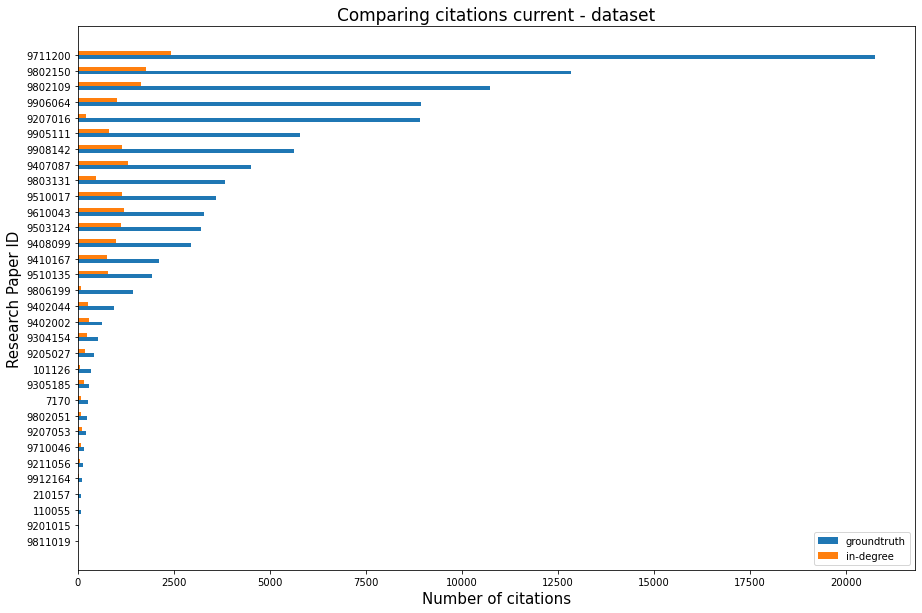

In [18]:
f,  ax1 = plt.subplots(1, 1, figsize=(15,10))
ind = np.arange(len(df_j))  
width = 0.25       
rects1 = ax1.barh(ind, df_j['groundtruth'], width)
rects2 = ax1.barh(ind+width, df_j['in_degree'], width)
ax1.legend(labels = ['groundtruth','in-degree'], loc = 'lower right')
ax1.set_title('Comparing citations current - dataset', fontsize=17 )
ax1.set_ylabel('Research Paper ID', fontsize=15)
ax1.set_xlabel('Number of citations', fontsize=15)
ax1.set_yticks(ind + width / 2)
ax1.set_yticklabels(df_j['node'])
plt.show()

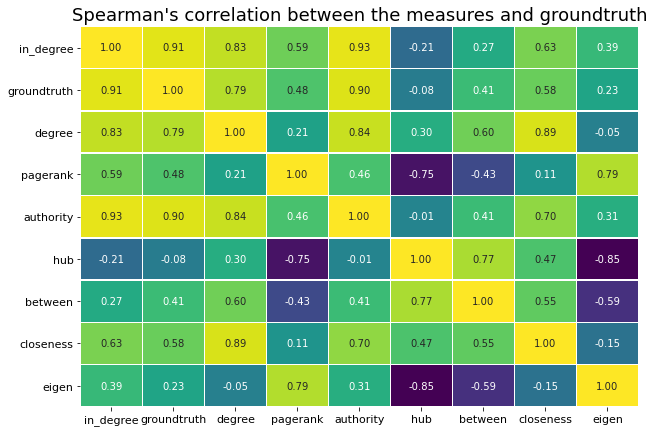

In [19]:
# Spearman's correlation

deg_cur = df_j[['in_degree','groundtruth', 'degree', 'pagerank', 'authority', 'hub', 'between', 'closeness', 'eigen']]

f,ax = plt.subplots(figsize=(10, 7))

sns.heatmap(deg_cur.corr('spearman'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.title("Spearman's correlation between the measures and groundtruth", fontsize=18)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

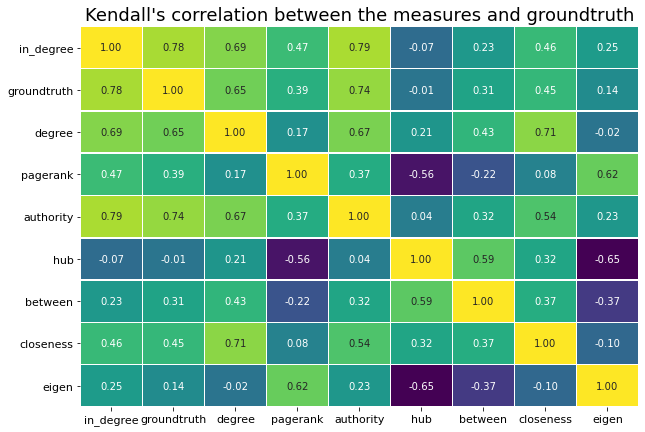

In [20]:
# Kendall's correlation
deg_cur = df_j[['in_degree','groundtruth', 'degree', 'pagerank', 'authority', 'hub', 'between', 'closeness', 'eigen']]

f,ax = plt.subplots(figsize=(10, 7))

sns.heatmap(deg_cur.corr('kendall'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.title("Kendall's correlation between the measures and groundtruth", fontsize=18)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

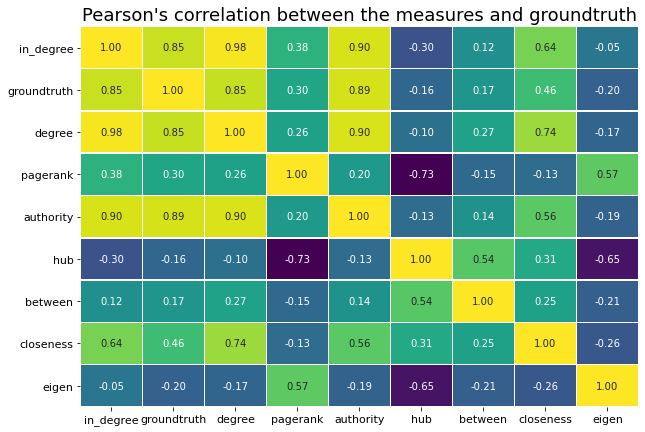

In [21]:
# Pearson's correlation
deg_cur = df_j[['in_degree','groundtruth', 'degree', 'pagerank', 'authority', 'hub', 'between', 'closeness', 'eigen']]

f,ax = plt.subplots(figsize=(10, 7))

sns.heatmap(deg_cur.corr('pearson'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.title("Pearson's correlation between the measures and groundtruth", fontsize=18)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

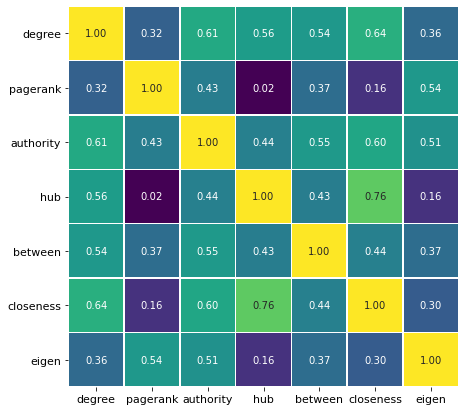

In [22]:
# Finding the correlation between the centrality measures
deg_corr = deg_df[['degree', 'pagerank', 'authority', 'hub', 'between', 'closeness', 'eigen']]

# Kendall's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('kendall'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

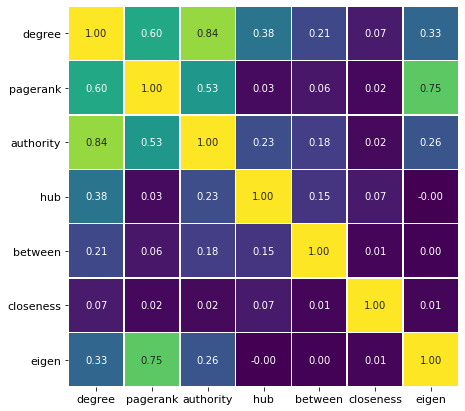

In [23]:
# Pearson's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('pearson'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

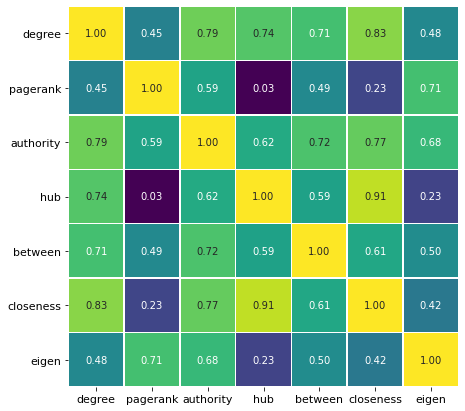

In [24]:
# Spearman's correlation
f,ax = plt.subplots(figsize=(7, 7))

sns.heatmap(deg_corr.corr('spearman'), cmap='viridis', annot=True, linewidths=.5, fmt= '.2f', cbar=False, ax=ax)
plt.xticks(fontsize=11,rotation=0)
plt.yticks(fontsize=11,rotation=0)
plt.show()

In [25]:
df_gt = pd.read_csv(datadir+'MRP\MRP_GT_V2.csv')
df_gt.head()

,ID,node,Current_in_deg,total_degree,in_degree,out_degree,Title,Date
0,1,9711200,20753,2468,2414,54,The Large N Limit of Superconformal Field Theo...,27-11-1997
1,2,9802150,12839,1797,1775,22,Anti De Sitter Space And Holography,20-02-1998
2,3,9802109,10739,1653,1641,12,Gauge theory correlators from non-critical str...,16-02-1998
3,4,9905111,5772,1369,807,562,"Large N field theories, string theory and gravity",14-05-1999
4,5,9407087,4515,1308,1299,9,"Monopole Condensation, And Confinement In N=2 ...",15-07-1994


In [26]:
df_gt.shape

(32, 8)